In [2]:
import os
import librosa

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing single audio

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
random_file_name="/content/drive/MyDrive/Colab Notebooks/Data/genres_original/blues/blues.00002.wav"

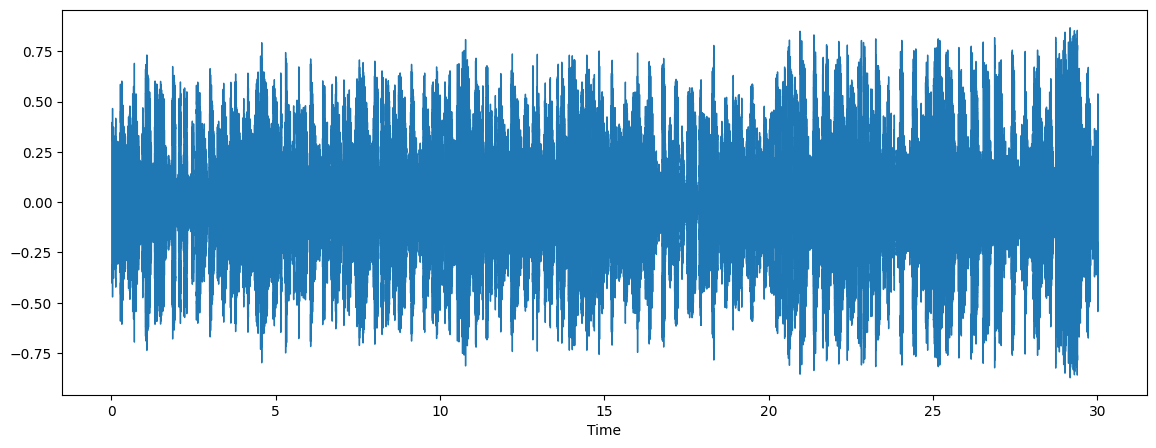

In [7]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [8]:
from IPython.display import Audio
Audio(data=x, rate=sr)

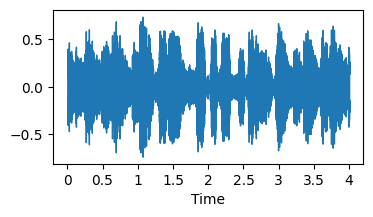

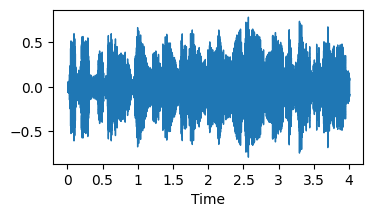

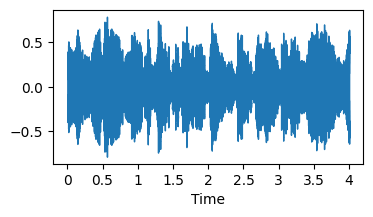

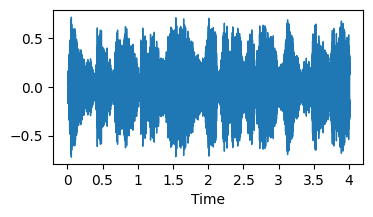

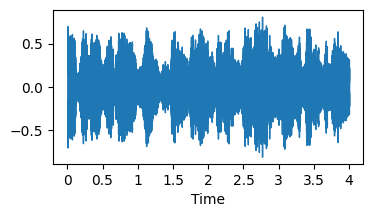

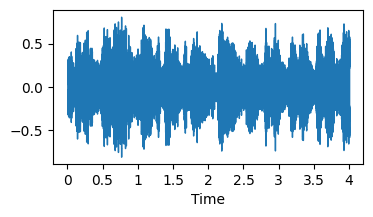

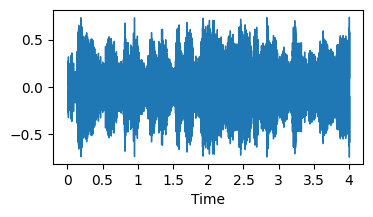

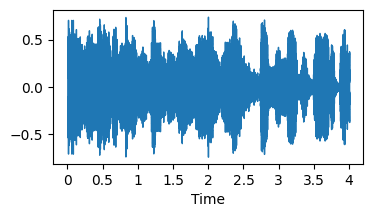

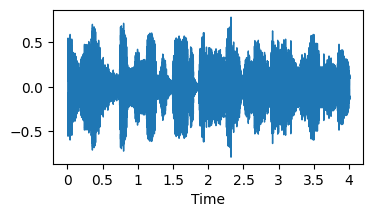

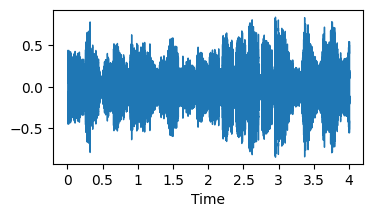

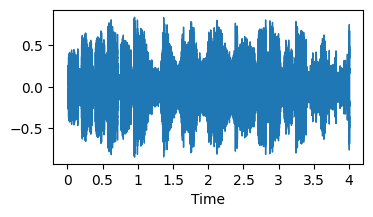

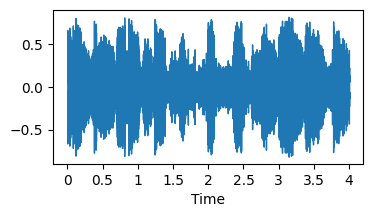

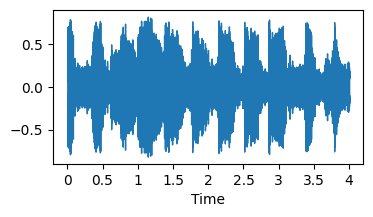

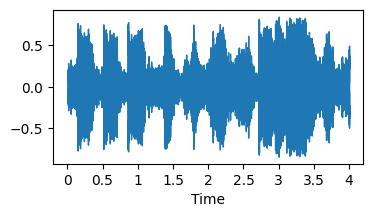

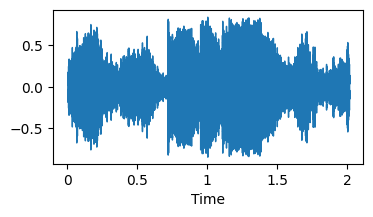

In [9]:
audio_path = "/content/drive/MyDrive/Colab Notebooks/Data/genres_original/blues/blues.00002.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

Melspectrogram Visualization

In [10]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [11]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        # Extract the chunk of audio
        chunk = y[start:end]

        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()


(128, 173)


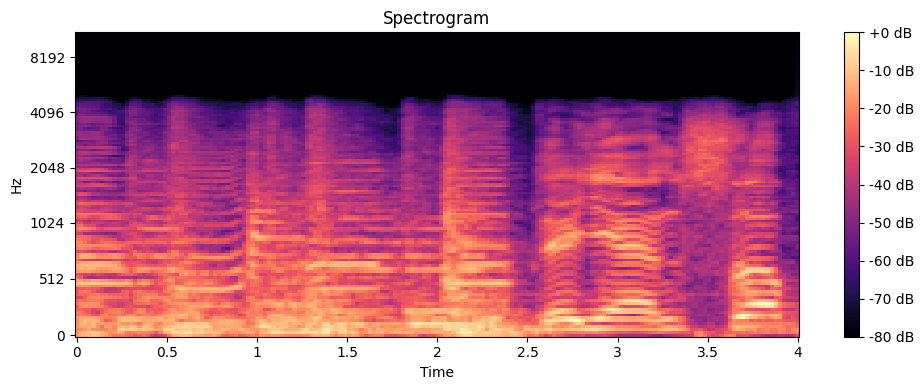

(128, 173)


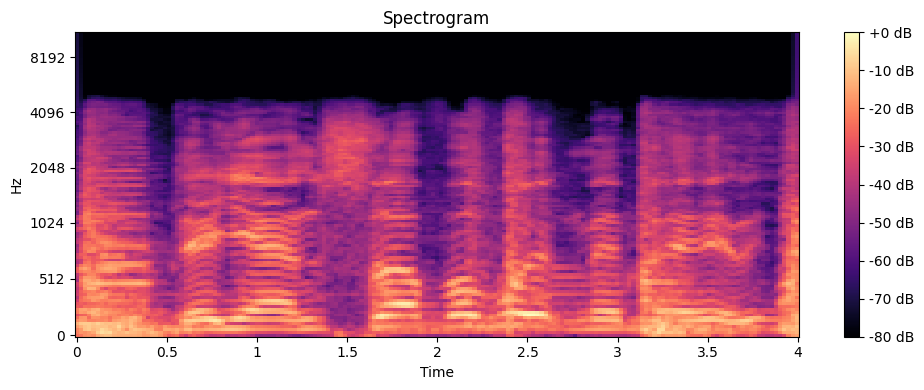

(128, 173)


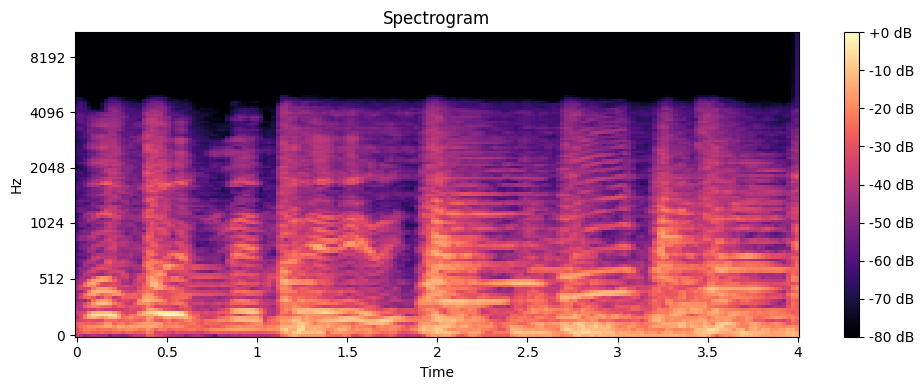

(128, 173)


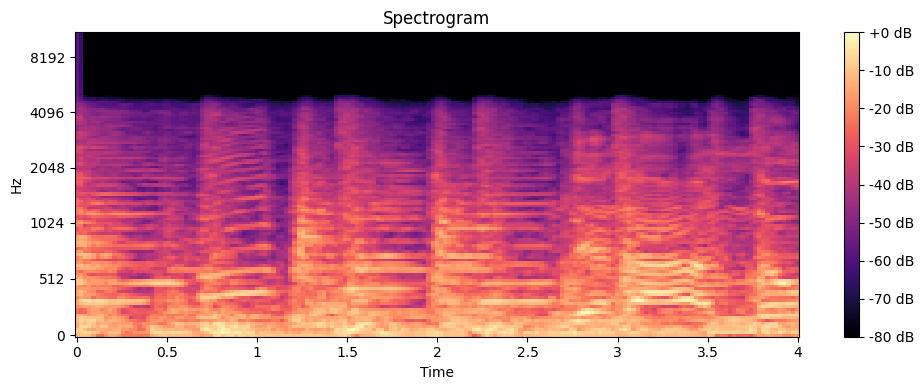

(128, 173)


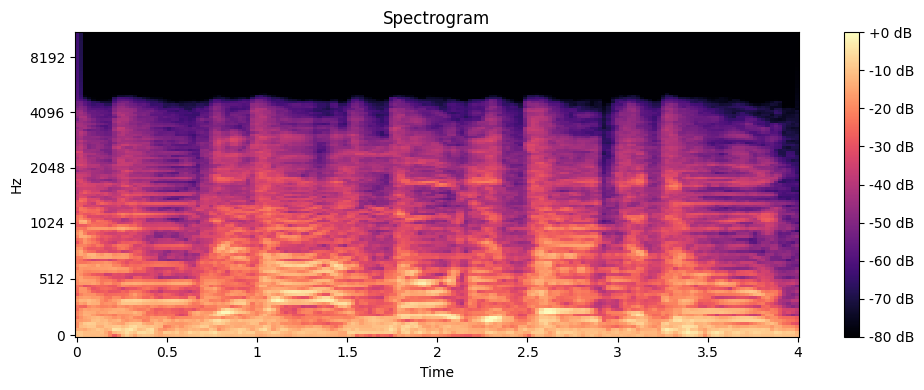

(128, 173)


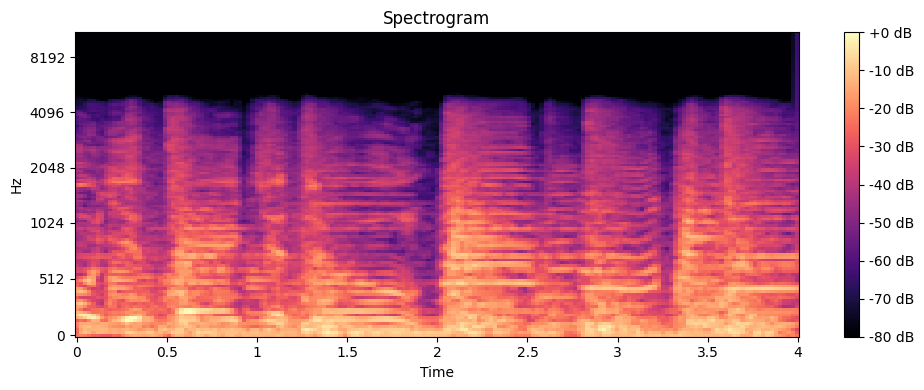

(128, 173)


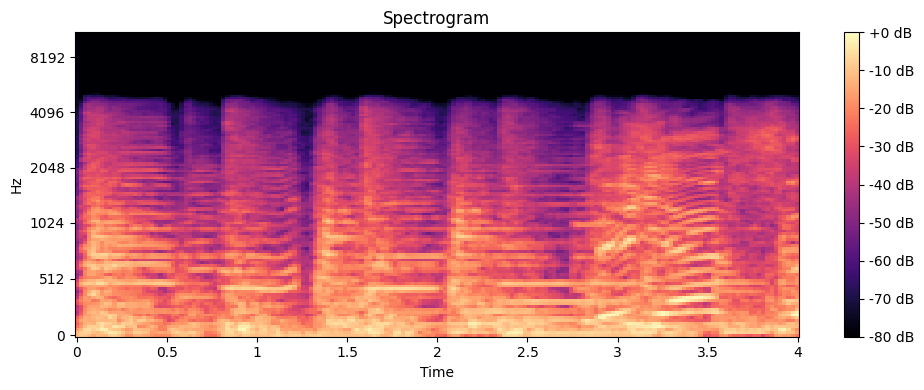

(128, 173)


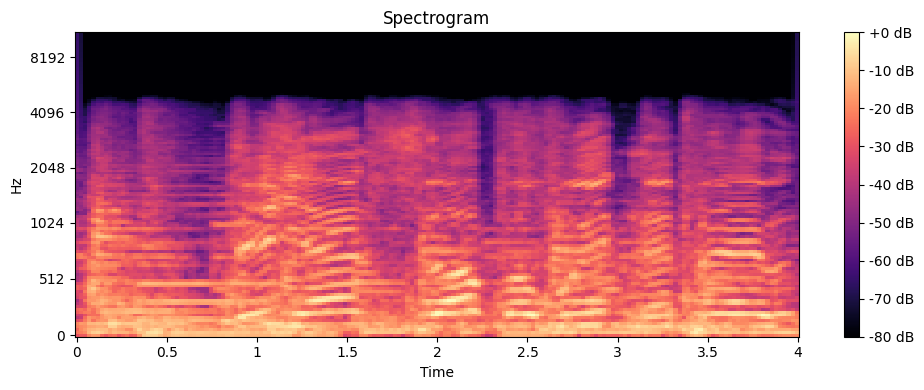

(128, 173)


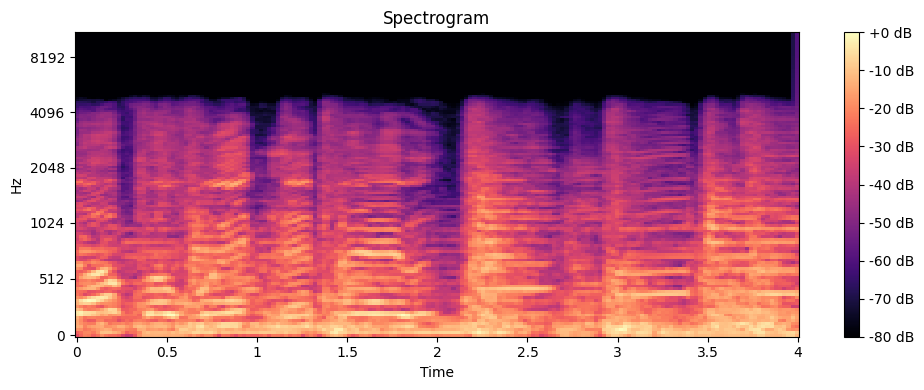

(128, 173)


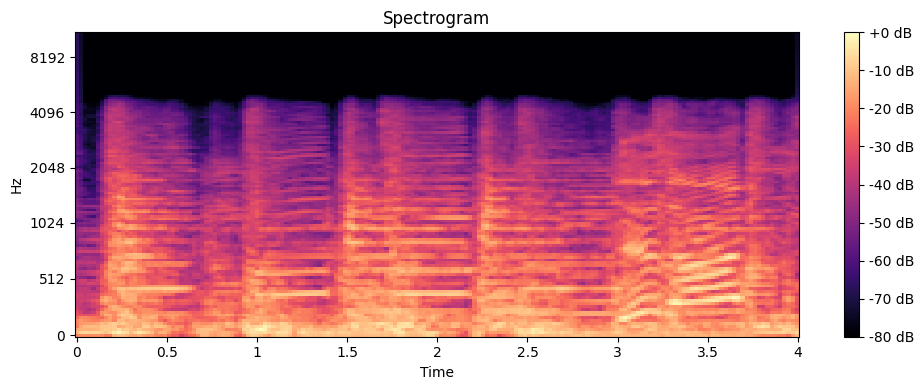

(128, 173)


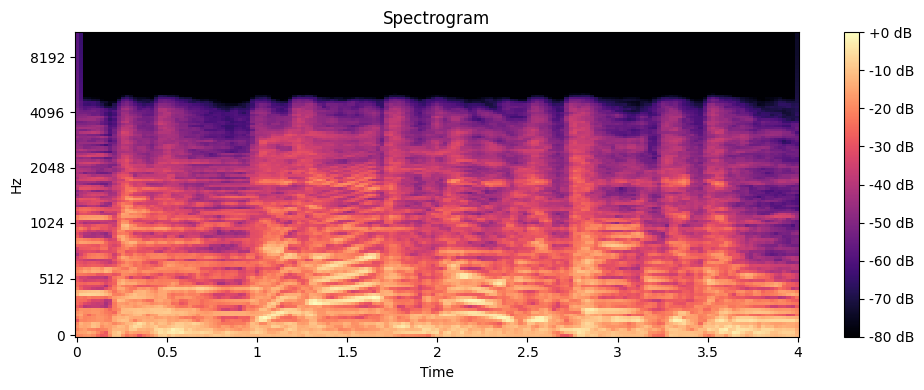

(128, 173)


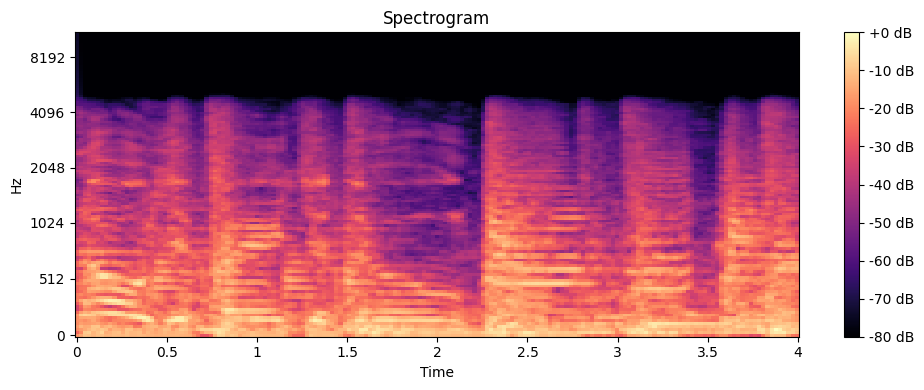

(128, 173)


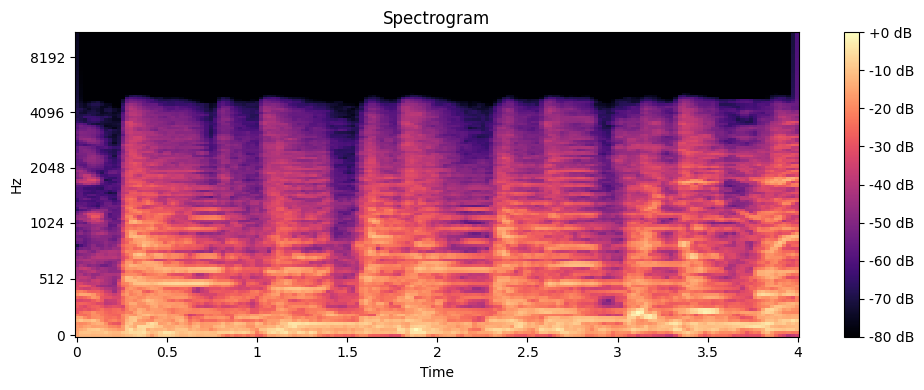

(128, 173)


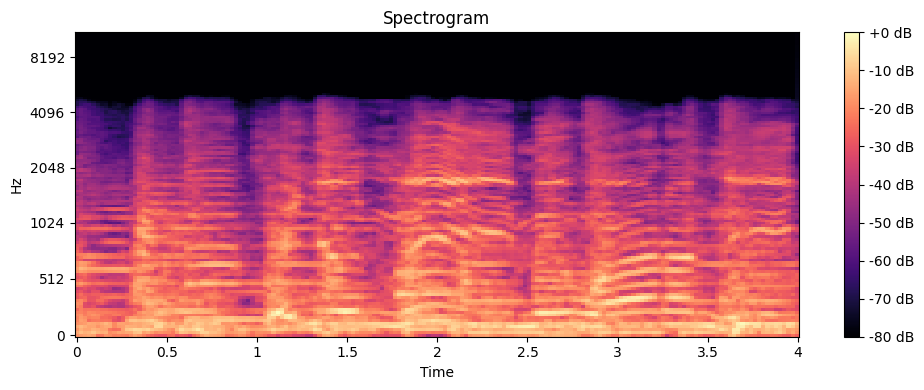

(128, 173)


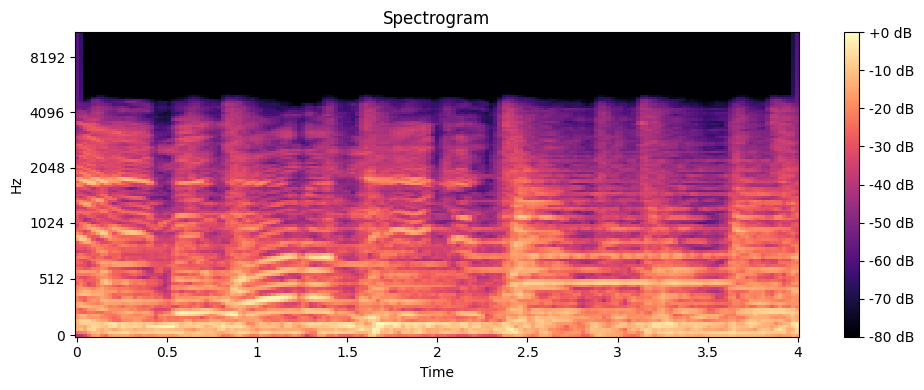

(128, 173)


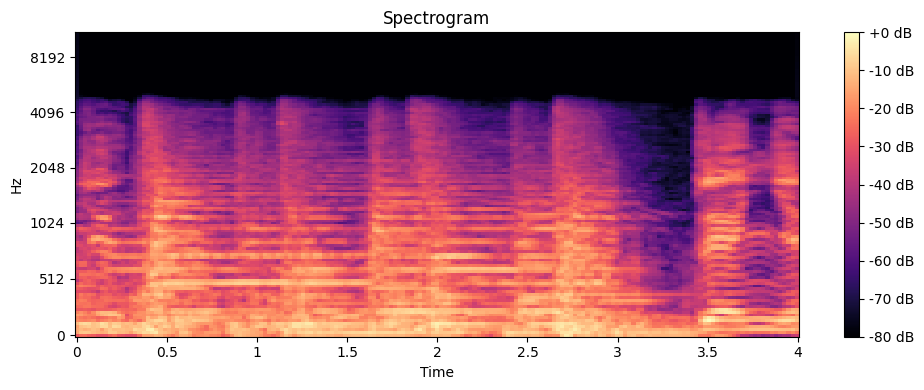

(128, 173)


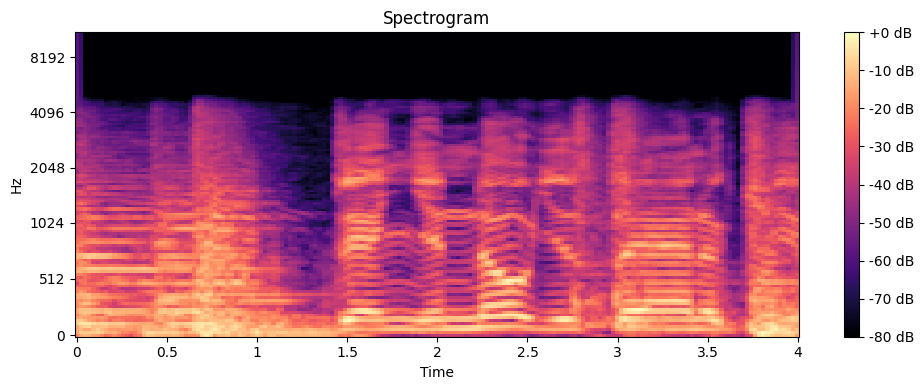

(128, 173)


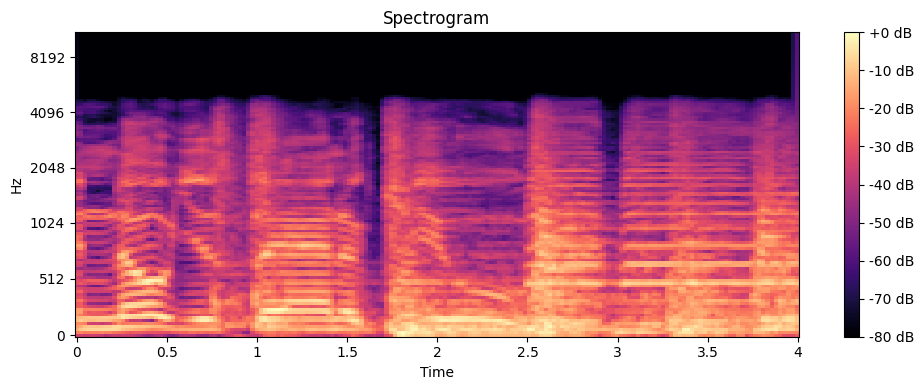

(128, 173)


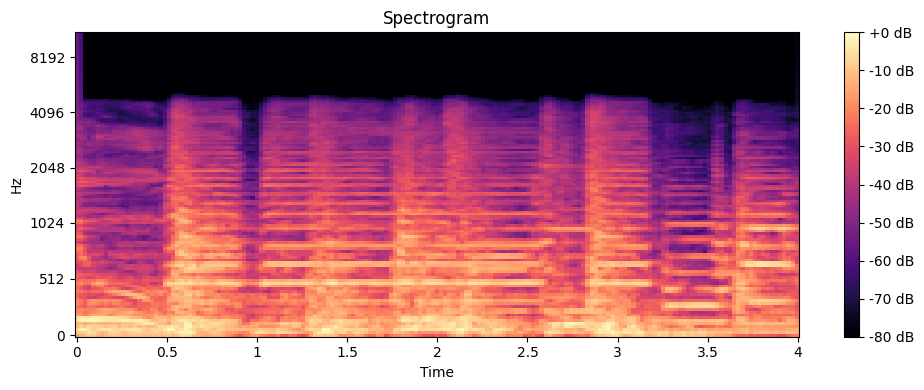

(128, 173)


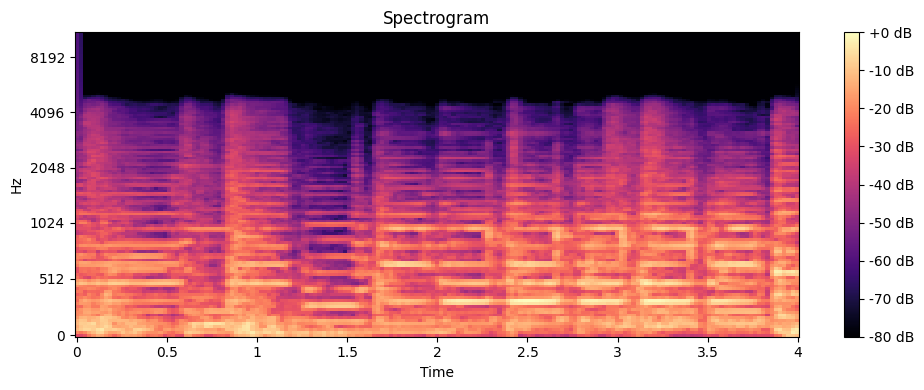

(128, 173)


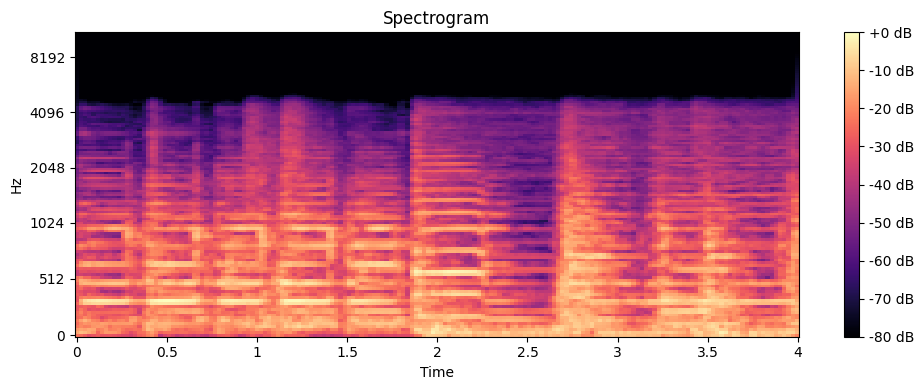

(128, 173)


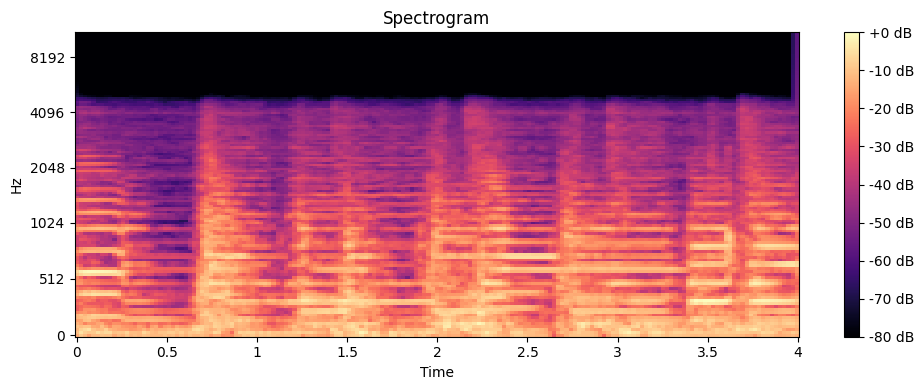

(128, 173)


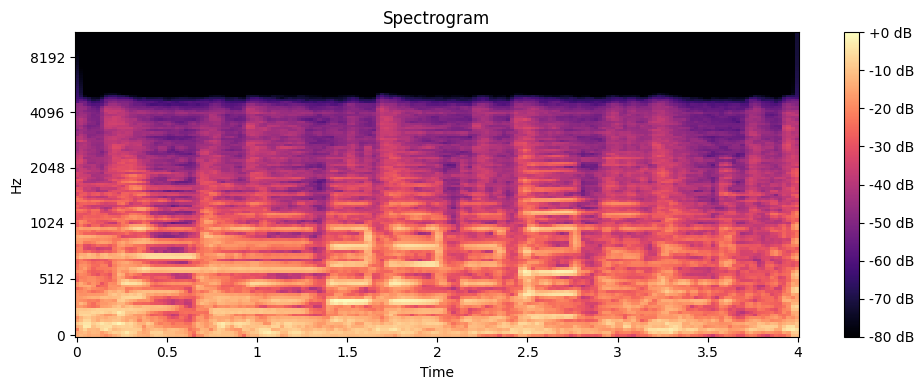

(128, 173)


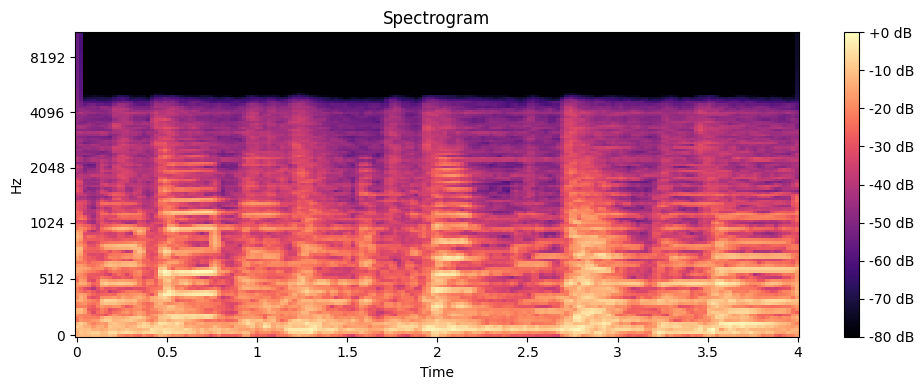

(128, 173)


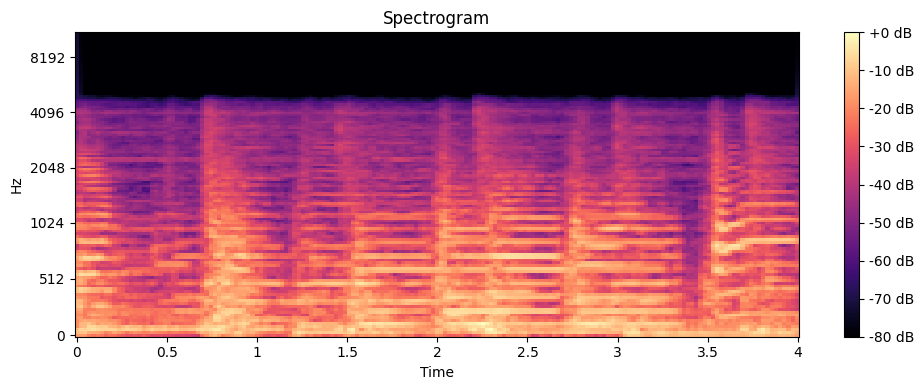

(128, 173)


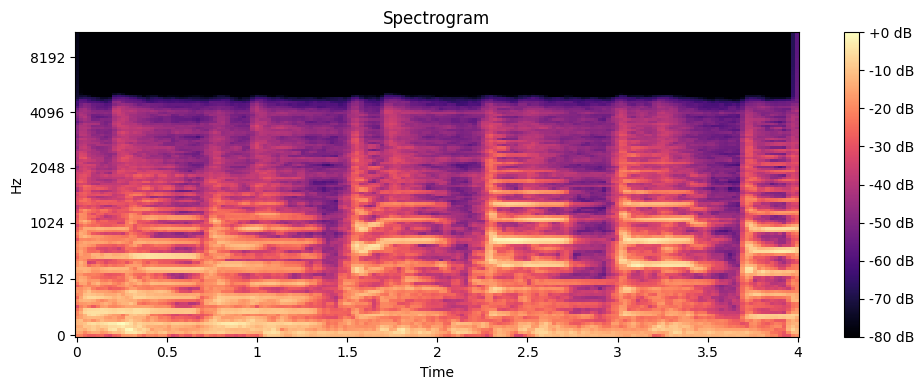

(128, 173)


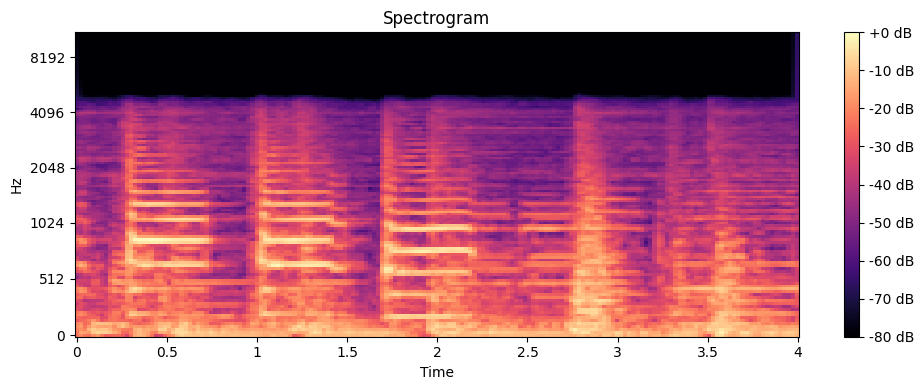

(128, 173)


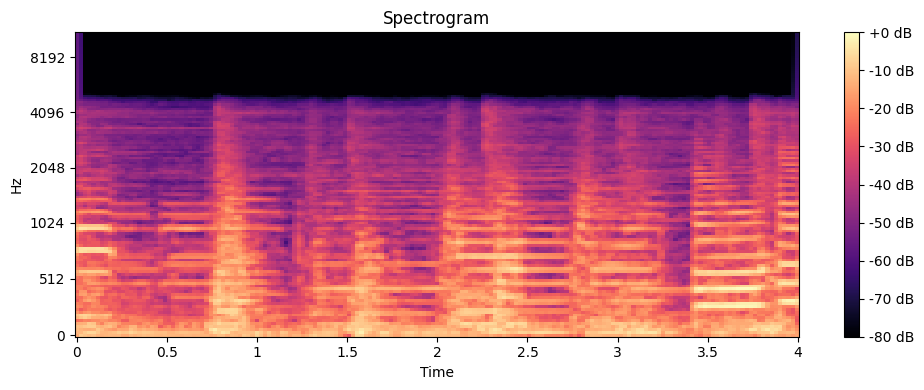

(128, 173)


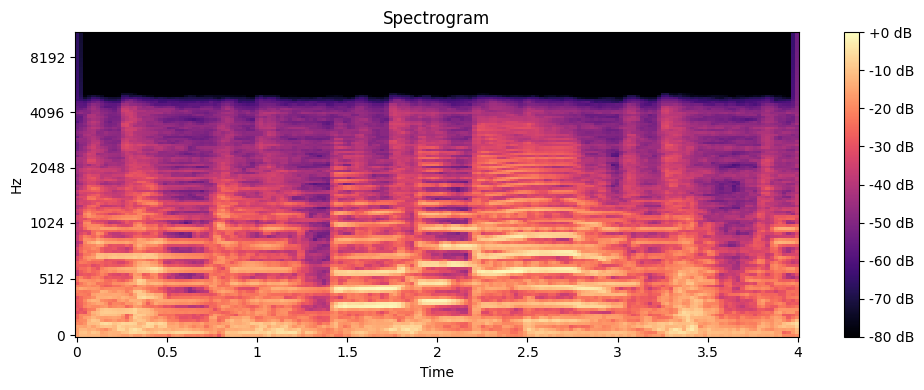

(128, 88)


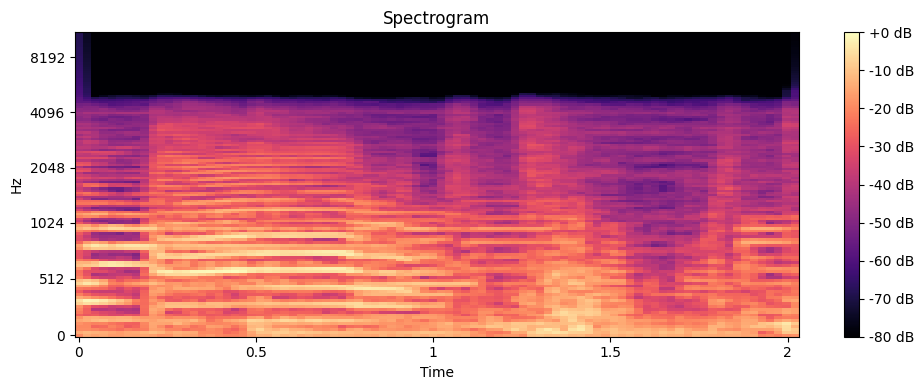

In [12]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

Data preprocessing

In [13]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/genres_original'
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [14]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds

                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples

                    # Extract the chunk of audio
                    chunk = audio_data[start:end]

                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)

                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)

In [15]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [16]:
data.shape

(14945, 150, 150, 1)

In [17]:
labels.shape

(14945,)

In [18]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
labels.shape

(14945, 10)

In [21]:
data.shape

(14945, 150, 150, 1)

Splitting dataset into training and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Building Model

In [23]:
model = tf.keras.models.Sequential()

In [24]:
X_train[0].shape

(150, 150, 1)

In [25]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(tf.keras.layers.Dropout(0.3))

In [29]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Dropout(0.3))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units=1200,activation='relu'))

In [34]:
model.add(Dropout(0.45))

In [35]:
#Output Layer
model.add(Dense(units=len(classes),activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [37]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
X_train.shape,y_train.shape

((11956, 150, 150, 1), (11956, 10))

In [39]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
374/374 [==============================] - 57s 117ms/step - loss: 1.9897 - accuracy: 0.2666 - val_loss: 1.6139 - val_accuracy: 0.4379
Epoch 2/30
374/374 [==============================] - 35s 94ms/step - loss: 1.4441 - accuracy: 0.4862 - val_loss: 1.2328 - val_accuracy: 0.5677
Epoch 3/30
374/374 [==============================] - 36s 97ms/step - loss: 1.1584 - accuracy: 0.5936 - val_loss: 1.0270 - val_accuracy: 0.6480
Epoch 4/30
374/374 [==============================] - 36s 96ms/step - loss: 0.9674 - accuracy: 0.6695 - val_loss: 0.9595 - val_accuracy: 0.6832
Epoch 5/30
374/374 [==============================] - 35s 94ms/step - loss: 0.8259 - accuracy: 0.7181 - val_loss: 0.7746 - val_accuracy: 0.7357
Epoch 6/30
374/374 [==============================] - 36s 96ms/step - loss: 0.7002 - accuracy: 0.7645 - val_loss: 0.7827 - val_accuracy: 0.7263
Epoch 7/30
374/374 [==============================] - 36s 96ms/step - loss: 0.5981 - accuracy: 0.7967 - val_loss: 0.6807 - val_accuracy

In [40]:
model.save("Trained_model.keras")

In [41]:
training_history.history


{'loss': [1.989670991897583,
  1.4440536499023438,
  1.1583558320999146,
  0.9673835039138794,
  0.825914740562439,
  0.7002071738243103,
  0.5981311202049255,
  0.5090827345848083,
  0.4191173017024994,
  0.3521271049976349,
  0.3002455234527588,
  0.26706236600875854,
  0.22560681402683258,
  0.19551725685596466,
  0.1736127734184265,
  0.15410862863063812,
  0.12613816559314728,
  0.1261989176273346,
  0.11311686038970947,
  0.12776894867420197,
  0.09828681498765945,
  0.07901039719581604,
  0.08674634993076324,
  0.07286810129880905,
  0.06483428180217743,
  0.0821450874209404,
  0.05752358213067055,
  0.06263693422079086,
  0.053843818604946136,
  0.05299726501107216],
 'accuracy': [0.26664435863494873,
  0.48619940876960754,
  0.593593180179596,
  0.6695383191108704,
  0.7181331515312195,
  0.7644697427749634,
  0.7966711521148682,
  0.8297089338302612,
  0.8565573692321777,
  0.8823184967041016,
  0.8959518074989319,
  0.9099196791648865,
  0.9243894219398499,
  0.9339243769645

In [42]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

Model Evalution

In [43]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9889594912528992


In [44]:
##Model Evaluation on Test set
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8949481248855591


Accuracy and Loss Visualization

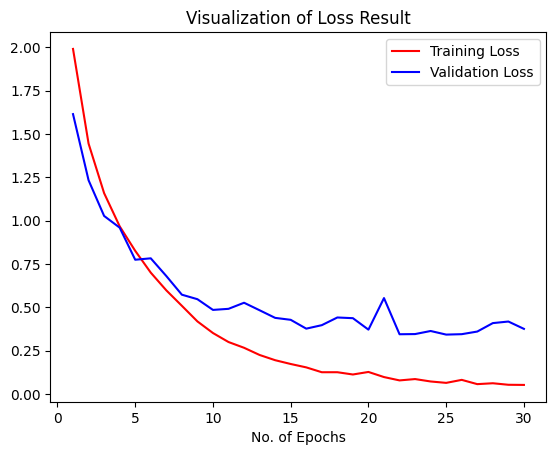

In [45]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

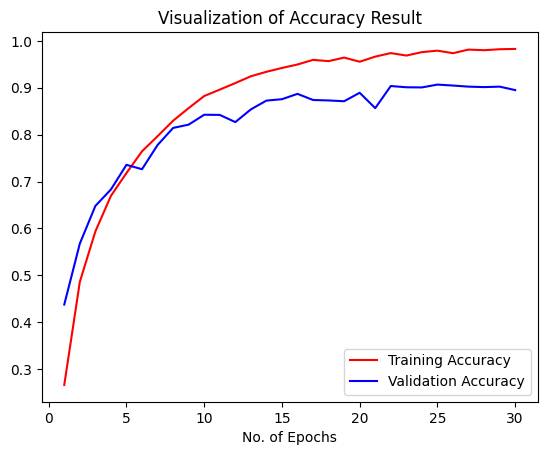

In [46]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

precision, Recall,Confusion Metrics calculation

In [47]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 2s 18ms/step


array([[9.39767688e-07, 4.73498740e-10, 5.70568482e-05, ...,
        7.04606720e-08, 1.72791095e-03, 4.25273646e-03],
       [1.08535623e-03, 2.38240391e-05, 7.55214036e-01, ...,
        1.33444313e-02, 3.03330850e-02, 3.77515353e-05],
       [1.81741164e-08, 1.40436326e-15, 9.32354179e-17, ...,
        2.57474264e-10, 1.93191522e-11, 4.98206698e-10],
       ...,
       [9.99998569e-01, 3.85041832e-14, 6.10392235e-08, ...,
        2.89142016e-10, 7.61550822e-10, 1.10946644e-06],
       [1.19786594e-11, 9.99875426e-01, 1.48276147e-09, ...,
        2.13013251e-09, 5.26118926e-09, 1.16850235e-04],
       [9.86821711e-01, 1.10218989e-08, 7.07193371e-03, ...,
        1.11862428e-05, 5.10537211e-06, 1.05062943e-04]], dtype=float32)

In [48]:
y_pred.shape

(2989, 10)

In [49]:
y_test.shape

(2989, 10)

In [50]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([3, 2, 4, ..., 0, 1, 0])

In [51]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([3, 2, 4, ..., 0, 1, 0])

In [53]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.97      0.87      0.92       296
   classical       0.92      0.95      0.94       301
     country       0.87      0.83      0.85       330
       disco       0.90      0.94      0.92       293
      hiphop       0.91      0.94      0.93       279
        jazz       0.85      0.93      0.89       315
       metal       0.92      0.95      0.93       296
         pop       0.90      0.88      0.89       299
      reggae       0.99      0.77      0.86       281
        rock       0.78      0.88      0.83       299

    accuracy                           0.89      2989
   macro avg       0.90      0.90      0.90      2989
weighted avg       0.90      0.89      0.89      2989



Confusion Matrix Visualization

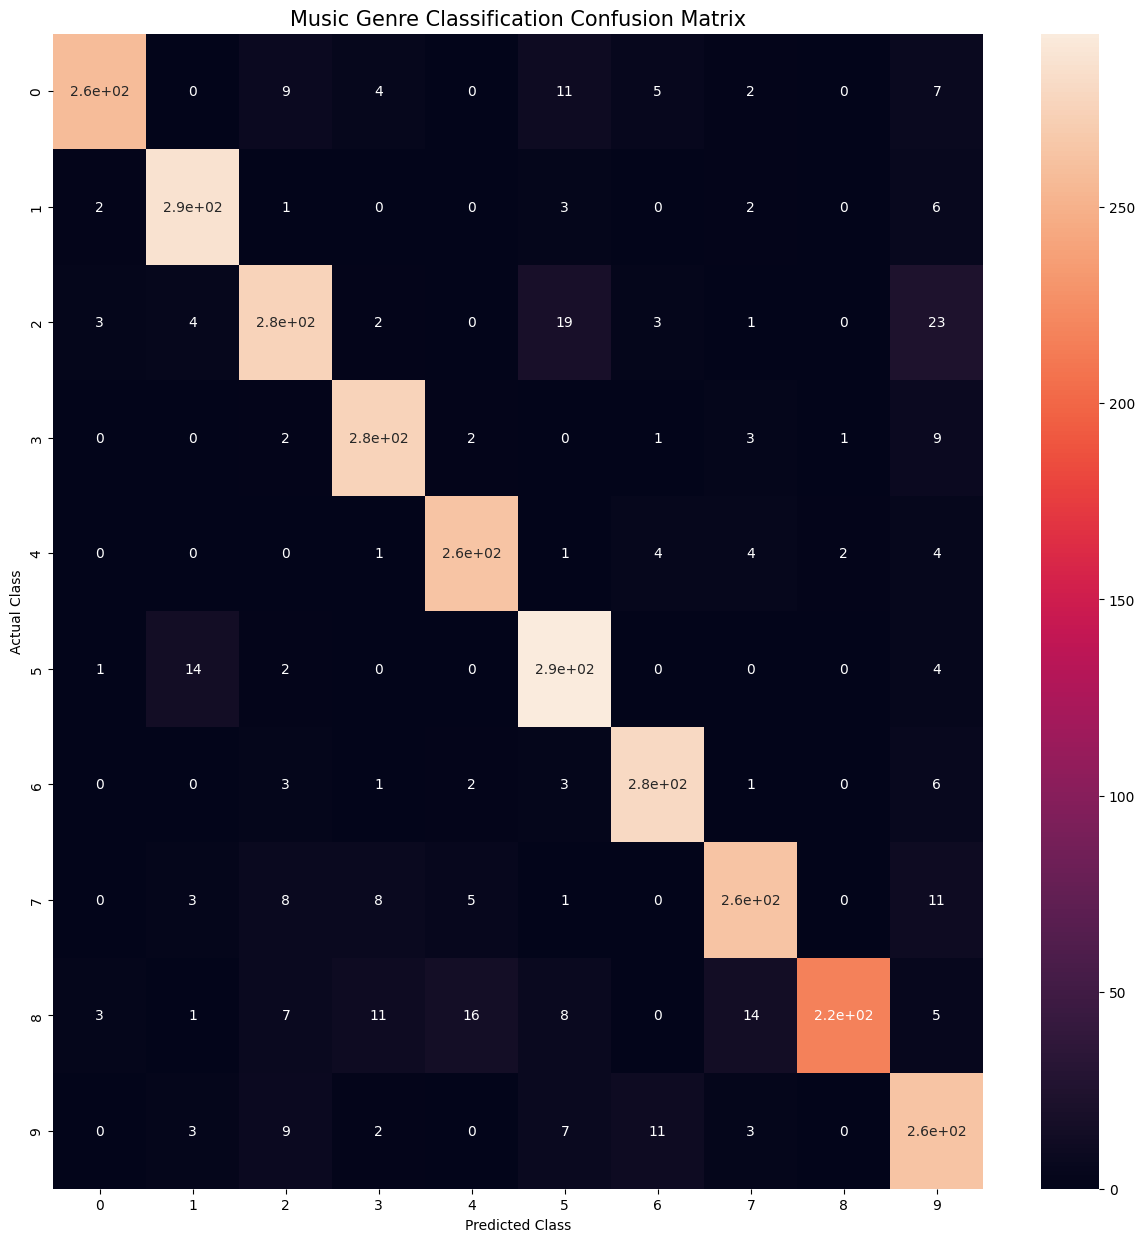

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()

In [56]:
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [57]:
def load_and_preprocess_data(file_path, target_shape=(150, 150)):
    data = []
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    # Convert durations to samples
    chunk_samples = chunk_duration * sample_rate
    overlap_samples = overlap_duration * sample_rate

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

                    # Extract the chunk of audio
        chunk = audio_data[start:end]

                    # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        data.append(mel_spectrogram)

    return np.array(data)

In [ ]:
from IPython.display import Audio
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/Hanuman-Chalisa(PagalNew.Com.Se).mp3"
y, sr = librosa.load(file_path, sr=44100)
Audio(data=y, rate=sr)

In [64]:
X_test = load_and_preprocess_data(file_path)

Model Prediction

In [65]:
def model_prediction(X_test):
  y_pred = model.predict(X_test)
  predicted_categories = np.argmax(y_pred, axis=1)
  unique_elements, counts = np.unique(predicted_categories, return_counts=True)
  max_count = np.max(counts)
  max_elements = unique_elements[counts == max_count]
  return max_elements[0]

In [66]:
c_index = model_prediction(X_test)
print(f"Model Prediction :: Music Genre --> {classes[c_index]}")


4/4 [==============================] - 0s 23ms/step
Model Prediction :: Music Genre --> hiphop
4/4 [==============================] - 0s 24ms/step
Model Prediction :: Music Genre --> hiphop
